# Building a machine learning model to predict the Profit of 50 Startups

In [38]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

## Read the Data

In [39]:
#Reading the data
df = pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\05. Multiple Linear Regression\50_Startups.csv")

## Lets explore the Data & Check Missing Values

In [117]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
df.describe()

,RandD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
#checking for missing values
df.isna().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

## Correlation Matrix

In [10]:
# Correlation Matrix
corr=df.corr()
corr

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#  Exploratory Data Analysis


<AxesSubplot:>

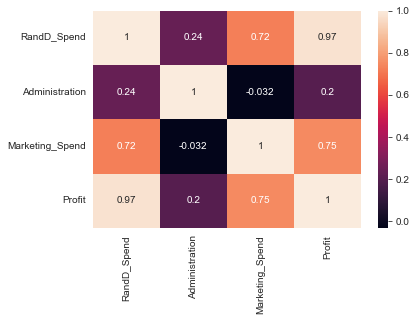

In [34]:
sns.heatmap(corr, annot=True)

## Insights from the above heatmap
### 1. Strong linear assocaition between Profit & R and Spend, good linear association between Profit & Marketing Spend
### 2. Very low linear association between profit & Administration
### 3. There is a Good linear association between the independet variables R and D Spend & Marketing Spend this has to be handled to avoid multicollinearity

## Scatterplot between variables along with histograms

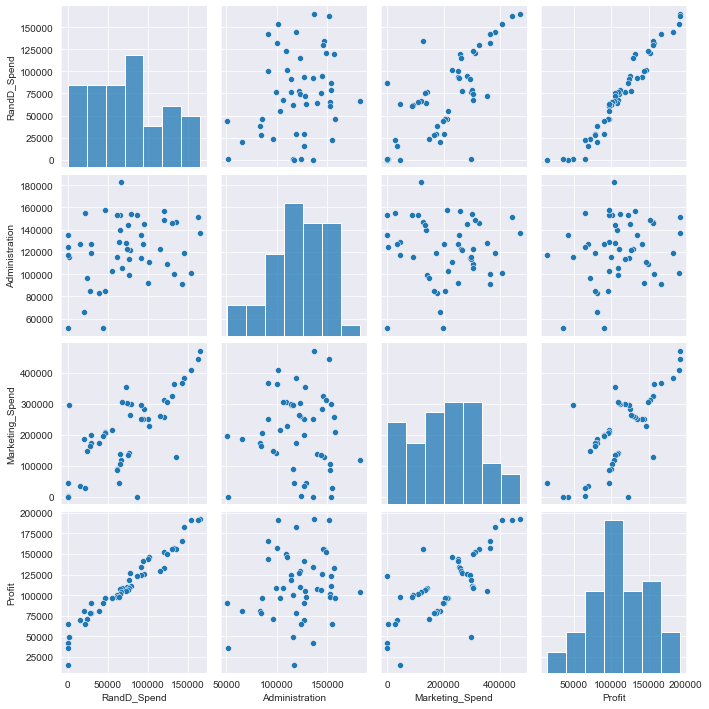

In [44]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# 

**From the above Scatter plots we can say that there is a strong linear association between Profit and RandSpend, there is a good linear association between Marketing & R and Spend this needs to be detected**






## Categorical Variable "State" is Transformed using OneHotEncoding

In [21]:
#Changes does not effect to "df" dataframe

df1=df.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1.iloc[:, 3] = labelencoder.fit_transform(df1.iloc[:,3])
df1
X=df1.iloc[:,:4]
y=df1.iloc[:,-1]

In [22]:
X.head()

,RandD_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [23]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [135]:
# Splitting Data, Training Data is 80% and Testing Data is 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

data=pd.DataFrame(X_train)
train_data=data.assign(Profit=y_train)
train_data.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
33,55493.95,103057.49,214634.81,1,96778.92
35,46014.02,85047.44,205517.64,2,96479.51
26,75328.87,144135.98,134050.07,1,105733.54
34,46426.07,157693.92,210797.67,0,96712.80
18,91749.16,114175.79,294919.57,1,124266.90


In [97]:
# Building the multi linear regression  model 

import statsmodels.formula.api as smf
model=smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend+State',data=train_data).fit()
predictions=model.predict(X_test)
predictions

28    103959.405080
11    132398.732367
10    133529.037901
41     72958.283683
2     179534.787372
27    115533.625841
38     67476.958479
31     98504.361994
22    114789.160838
4     168972.219099
dtype: float64

## Residual Y_Actual Vs Y Predicted

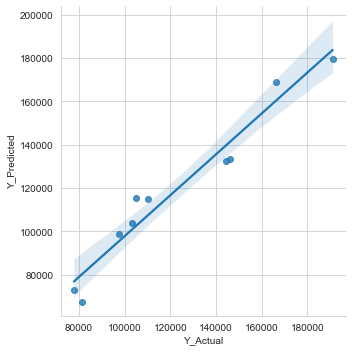

In [105]:
# Regression Plot With Y_Actual Vs Y_Predicted


d={'Y_Actual':y_test, 'Y_Predicted': predictions}
Residual=pd.DataFrame(d)

sns.set_style('whitegrid')
sns.lmplot(x ='Y_Actual', y ='Y_Predicted', data = Residual)

## Model Coefficients

In [107]:
# Coefficients
model.params

Intercept          42658.087123
RandD_Spend            0.777204
Administration         0.030243
Marketing_Spend        0.034924
State                315.877202
dtype: float64

## Model Summary

In [109]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.01e-22
Time:                        23:11:36   Log-Likelihood:                -421.17
No. Observations:                  40   AIC:                             852.3
Df Residuals:                      35   BIC:                             860.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.266e+04   8248.360      5.172      0.000    2.59e+04    5.94e+04
RandD_Spend         0.7772      0.053     14.541      0.000       0.669       0.886
Administration      0.0302      0.065      0.464      0.646      -0.102       0.163
Marketing_Spend     0.0349      0.019      1.878      0.069      -0.003       0.073
State             315.8772   1805.304      0.175      0.862   -3349.085    3980.840
==============================================================================
Omnibus:                       15.306   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.372
Skew:                          -1.087   Prob(JB):                     2.29e-05
Kurtosis:                       5.845   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating Variance Inflation Factor (VIF)

In [116]:
# Calculating VIF
# Checking multicollinearity

rsq_RandD = smf.ols('RandD_Spend~Administration+State+Marketing_Spend',data=df1).fit().rsquared  
vif_RandD = 1/(1-rsq_RandD) 

rsq_Admin = smf.ols('Administration~RandD_Spend+State+Marketing_Spend',data=df1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

rsq_State = smf.ols('State~RandD_Spend+Administration+Marketing_Spend',data=df1).fit().rsquared  
vif_State = 1/(1-rsq_State)

rsq_Marketing = smf.ols('Marketing_Spend~State+RandD_Spend+Administration',data=df1).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)

# Storing vif values in a data frame
d1 = {'Variables':['RandD_Spend','Administration','State','Marketing_Spend'],'VIF':[vif_RandD,vif_Admin,vif_State,vif_Marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RandD_Spend,2.481178
1,Administration,1.175315
2,State,1.011281
3,Marketing_Spend,2.326780


# Summary

VIF's among the Independent variables are lesser than 5, and **R Squared Value is 0.9386861070938133**, from these metrics we can conclude that the **Multiple linear Regression model is Successful with 93.8 % Accuracy**

## Simple Linear Regression models with Training Data

In [120]:
RandD_model=smf.ols('Profit~RandD_Spend', data=train_data).fit()
print('tvalue is: ',RandD_model.tvalues,'\n','pvalue is: ', RandD_model.pvalues)

tvalue is:  Intercept      17.031700
RandD_Spend    25.542008
dtype: float64 
 pvalue is:  Intercept      2.222358e-19
RandD_Spend    1.562780e-25
dtype: float64


In [122]:
Admin_model=smf.ols('Profit~Administration', data=train_data).fit()
print('tvalue is: ',Admin_model.tvalues,'\n','pvalue is: ', Admin_model.pvalues)

tvalue is:  Intercept         1.502465
Administration    2.173906
dtype: float64 
 pvalue is:  Intercept         0.141243
Administration    0.036010
dtype: float64


In [124]:
State_model=smf.ols('Profit~State', data=train_data).fit()
print('tvalue is: ', State_model.tvalues,'\n','pvalue is: ', State_model.pvalues)

tvalue is:  Intercept    10.583672
State         1.104924
dtype: float64 
 pvalue is:  Intercept    6.892664e-13
State        2.761396e-01
dtype: float64


In [125]:
MarketingSpend_model=smf.ols('Profit~Marketing_Spend', data=train_data).fit()
print('tvalue is: ',MarketingSpend_model.tvalues,'\n','pvalue is: ', MarketingSpend_model.pvalues)

tvalue is:  Intercept          7.176652
Marketing_Spend    7.005470
dtype: float64 
 pvalue is:  Intercept          1.420216e-08
Marketing_Spend    2.417749e-08
dtype: float64


# Residual Analysis

## Test For Normality of Residuals (Q-Q Plot)

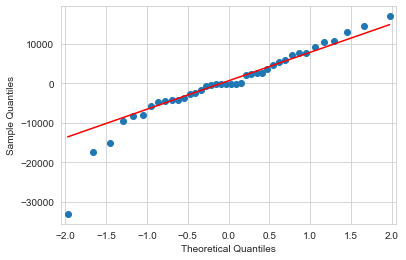

In [143]:
#import statsmodels.api as sm

QQplot=sm.qqplot(model.resid, line='q')

### From the above Q-Q plot we can observe that the maximum points touching the line, here the the nature of the  residual data is nearly normal, hence we dont have to deal with outliers

## Homoscedasticity Checking with Scatterplot

In [139]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Error Values')

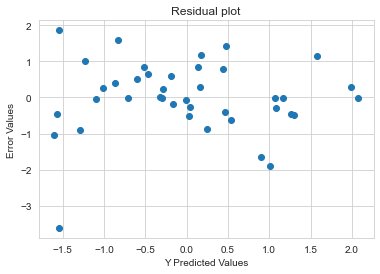

In [144]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))


plt.title("Residual plot")
plt.xlabel("Y Predicted Values")
plt.ylabel("Error Values")  

#### From the above Scatter plot we can observe that the data points are completely random, there is no relationship between Error Values vs Predicted Values

# Residual Vs Regressors

eval_env: 1


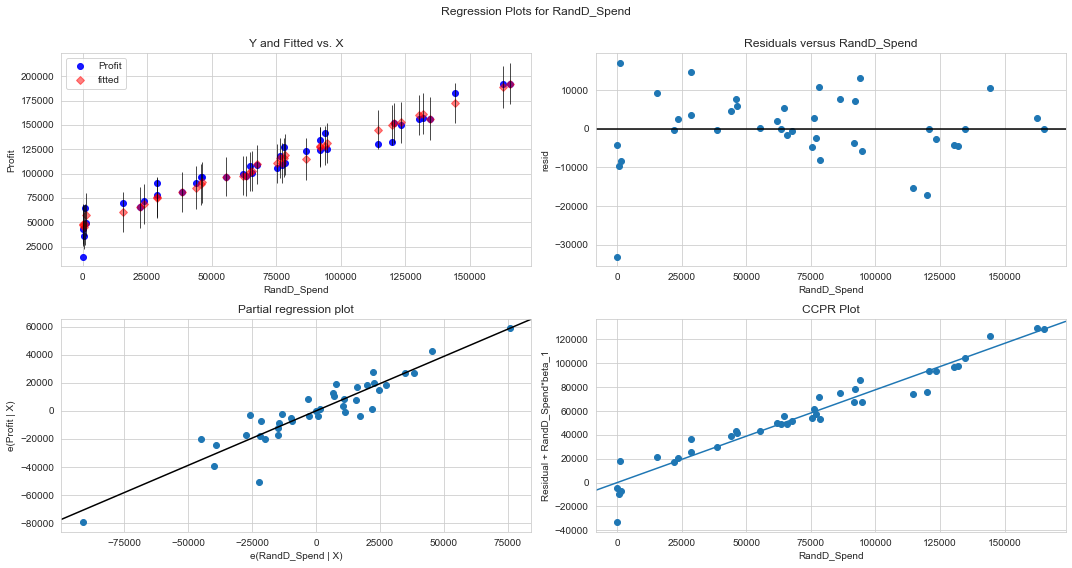

In [149]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'RandD_Spend', fig=fig)

eval_env: 1


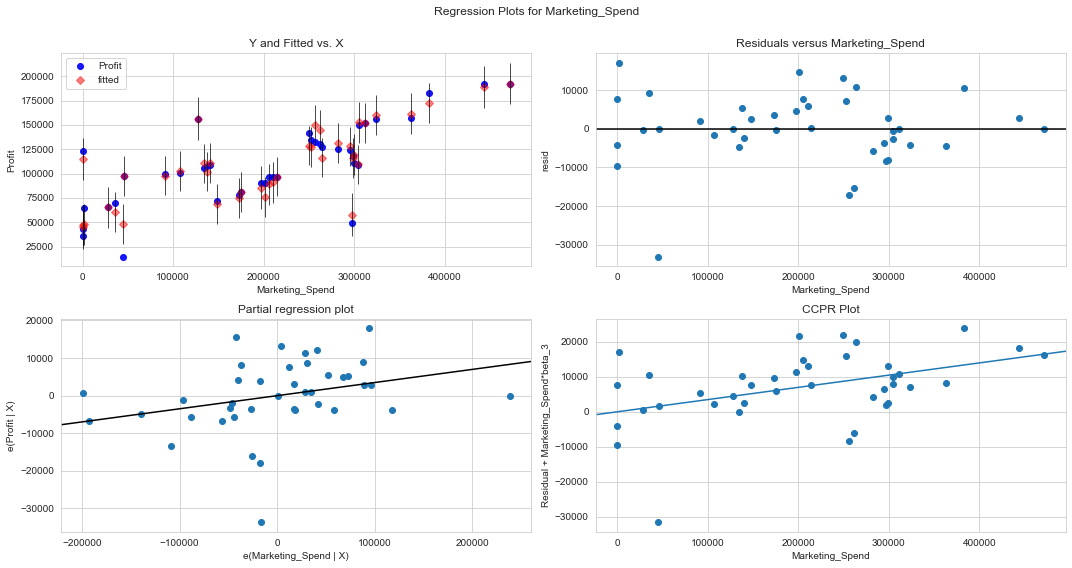

In [154]:
plot=plt.figure(figsize=(15,8))
fig1=sm.graphics.plot_regress_exog(model,'Marketing_Spend', fig=plot)

eval_env: 1


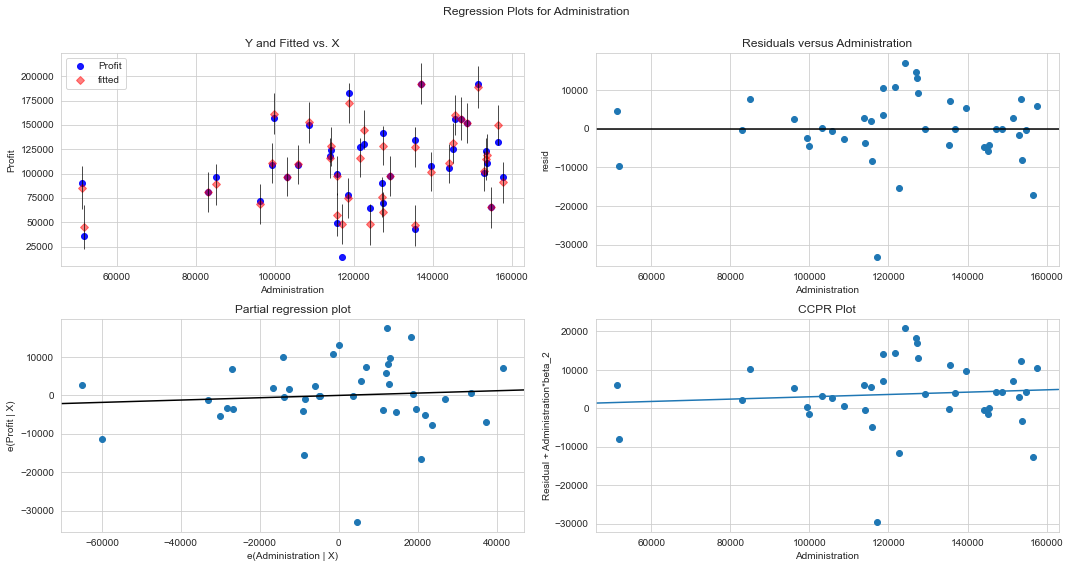

In [156]:
plot1=plt.figure(figsize=(15,8))
fig2=sm.graphics.plot_regress_exog(model,'Administration', fig=plot1)

eval_env: 1


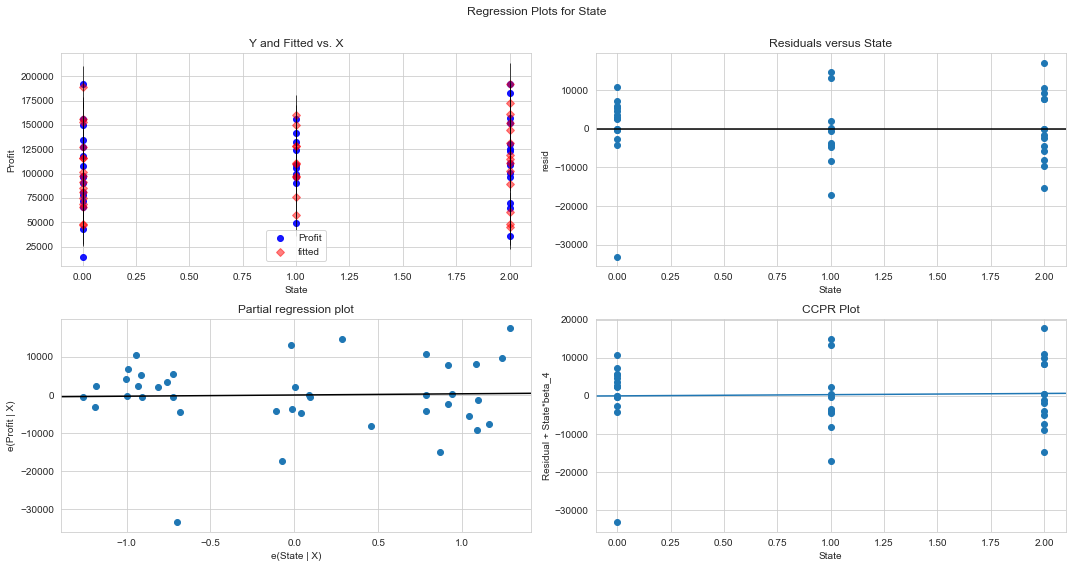

In [157]:
plot2=plt.figure(figsize=(15,8))
fig3=sm.graphics.plot_regress_exog(model,'State', fig=plot2)

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook's Distance

In [160]:
model_influence=model.get_influence()

In [162]:
(c,_)=model_influence.cooks_distance

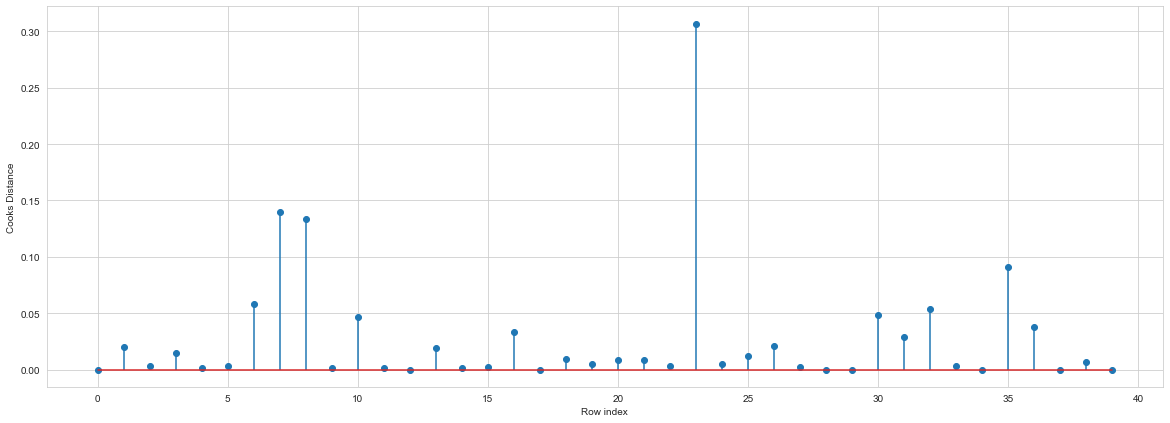

In [164]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [165]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(23, 0.3073502679501286)

# High Influence Points

<function matplotlib.pyplot.show(close=None, block=None)>

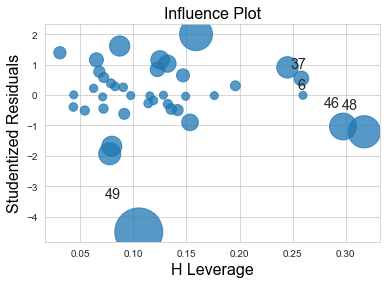

In [178]:
# from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show

### From the above influence plot we can observe that the point 49 is the outlier

In [ ]:
k = train_data.shape[1]
n = train_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

In [180]:
df[df.index.isin([49])]
train_data[train_data.index.isin([49])]

,RandD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [188]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 33 to 44
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      40 non-null     float64
 1   Administration   40 non-null     float64
 2   Marketing_Spend  40 non-null     float64
 3   State            40 non-null     int32  
 4   Profit           40 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 2.8 KB


# Improving the Model

In [189]:
#Discard the data points which are influencers/Outliers and reasign the row number (reset_index())
#Dropping index no 49 row data from the dataframe
train_data1=train_data.drop(index=49,axis=0) 
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 33 to 44
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      39 non-null     float64
 1   Administration   39 non-null     float64
 2   Marketing_Spend  39 non-null     float64
 3   State            39 non-null     int32  
 4   Profit           39 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.7 KB


# Now Building a model with train_data1 dataset


In [221]:
model_new=smf.ols('Profit~RandD_Spend+Marketing_Spend+Administration+State',data=train_data1).fit()
print(' model_new Rquare value is:',int(model_new.rsquared*100),'%','\n','model_new AIC value is:' ,model_new.aic,'\n','model_new BIC value is:',model_new.bic)

 model_new Rquare value is: 96 % 
 model_new AIC value is: 814.022481269027 
 model_new BIC value is: 822.3402894996752


In [215]:
#Checking Multicollinearity effect if any by removing Marketing_Spend Variable
model_RandD=smf.ols('Profit~RandD_Spend+Administration+State',data=train_data1).fit()

In [214]:
print(' model_RandD Rsquared value is:',model_RandD.rsquared,'\n','model_RandD AIC value is:',model_RandD.aic,'\n','model_RandD BIc value is:', model_RandD.bic)

 model_RandD Rsquared value is: 0.9584250114984865 
 model_RandD AIC value is: 817.1645452021572 
 model_RandD BIc value is: 823.8187917866758


In [218]:
#Checking Multicollinearity effect if any by removing RandD_Spend Variable
model_Marketing_Spend=smf.ols('Profit~Marketing_Spend+Administration+State', data=train_data1).fit()

In [217]:
print(' model_Marketing_Spend Rsquared value is:',model_Marketing_Spend.rsquared,'\n','model_Marketing_Spend AIC value is:',model_Marketing_Spend.aic,'\n','model_Marketing_Spend AIC value is:',model_Marketing_Spend.bic)

 model_Marketing_Spend Rsquared value is: 0.640017354751111 
 model_Marketing_Spend AIC value is: 901.3482710935915 
 model_Marketing_Spend AIC value is: 908.00251767811


### From the above all 3 models results I will choose the best model as model_new to predict the Profit of 50 Startups,I have considered all features since there is no effect of multicollinearity.

## model_new Rquare value is: 96 %


## model_new AIC value is: 814.022481269027

## model_new BIC value is: 822.3402894996752

# Predicting for test data

In [229]:
model_new.predict(X_test)

28    105619.902185
11    133103.556323
10    133488.132591
41     74728.115329
2     177726.670002
27    115197.195762
38     68346.195021
31     99221.841706
22    115380.807372
4     167467.658067
dtype: float64